# Two illustrations of the 1/12° config (NANUK12)

Last update 2024-07-18

Notebook used to prepare plots to illustrate the future 1/12° config NANUK12 for proposals. 

I used outputs from a NANUK12 test simulation from 2023 while LB and AA were developping BBM and testing various namelist choice. 

The aim here is to illustrate the mesh and the extent of the domain, including the full Arctic basin as well as the north part of the Atlantic  down to 40°N (including the Gulf Stream near the border).

Left to do: clean functions before incorporating to my library.

In [3]:
## standart libraries

import os,sys
import sys

import numpy as np
from scipy import stats
import pandas as pd
import numpy.ma as ma

# xarray
import xarray as xr


# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



sys.path.append('/gpfswork/rech/cli/regi915/DEVGIT/xscale/')
import xscale


# custom tools for analysis and plots
sys.path.append('/gpfswork/rech/cli/regi915/DEVGIT/ABL4SI/NOTEBOOKS/')
from libseaice import libseaice as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libseaice.libseaice
Package: libseaice
This is a collection of  tools i often use when analysing sea ice NEMO based outputs.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


# Define some functions

In [4]:
# define a function for later use (plotting purposes)

def Fnospines(ax,pspines=False,paxis='off'):
    """
    Remove spines from around the plot
    
    Return: (ax)
    """
    ax.spines['top'].set_visible(pspines)
    ax.spines['right'].set_visible(pspines)
    ax.spines['bottom'].set_visible(pspines)
    ax.spines['left'].set_visible(pspines)
    ax.axis(paxis)

def Fsetcmapnorm(var2plt,vmin=-1,vmax=1,cblev=[0]):
            
        # color map field 
        if var2plt=='siconc':
            if len(cblev)==1:
                cblev=[0,0.6,0.8,0.9,0.95,0.99]
            cmap = cmocean.cm.ice
            cmap.set_bad('k',0.0)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.PowerNorm(gamma=4.5,vmin=vmin, vmax=vmax)
            
        # color map field 
        elif var2plt=='windsp':
            if len(cblev)==1:
                cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
            cmap = cm.Spectral_r
            cmap.set_bad('k',1.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
 
        elif var2plt=='qt_ice':
            if len(cblev)==1:
                cblev=[-200,-100,0]
            cmap = cmocean.cm.matter
            cmap.set_bad('k',1.)
            cmap.set_under('w')
            cmap.set_over('k')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

        # color map field 
        elif ((var2plt=='taum')|(var2plt=='taum_ice')):
            if len(cblev)==1:
                cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
            cmap = cm.Spectral_r
            cmap.set_bad('k',1.)
            cmap.set_under('w')
            cmap.set_over('k')
            #norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
            norm = mcolors.PowerNorm(gamma=0.3,vmin=vmin, vmax=vmax)
            

        # color map field 
        elif var2plt=='sivelo-t':
            if len(cblev)==1:
                print(cblev)
                cblev=[0,0.1,0.2]
            print(cblev)
            #cmap = cm.RdYlGn_r
            cmap = cmocean.cm.thermal
            cmap.set_bad('k',1.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
            
        # color map field 
        elif var2plt=='sidefo-t':
            if len(cblev)==1:
                cblev=[0,0.001e-4,0.01e-4,0.025e-4,0.05e-4,0.1e-4,0.2e-4,0.3e-4]
            cmap = cmocean.cm.thermal
            cmap.set_bad('r',1.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.PowerNorm(gamma=0.3,vmin=vmin, vmax=vmax)
            
        elif (var2plt=='pblh'):
            if len(cblev)==1:
                cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
            cmap = cm.Spectral_r
            cmap.set_bad('k',1.)
            cmap.set_under('w')
            cmap.set_over('k')
            #norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
            norm = mcolors.PowerNorm(gamma=0.3,vmin=vmin, vmax=vmax)

        # color map field 
        elif var2plt=='res':
            if len(cblev)==1:
                print(cblev)
                cblev=[0,2,30]
            print(cblev)
            #cmap = cm.RdYlGn_r
            cmap = cm.viridis_r
            cmap.set_bad('k',0.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
            
        # color map field 
        elif var2plt=='tos':
            if len(cblev)==1:
                print(cblev)
                cblev=[0,2,30]
            print(cblev)
            #cmap = cm.RdYlGn_r
            cmap = cm.Spectral_r
            cmap.set_bad('k',0.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
            
        else :
            if len(cblev)==1:
                cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
            cmap = cm.get_cmap('Spectral')
            cmap.set_bad('k',1.)
            cmap.set_under('k')
            cmap.set_over('w')
            norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        return cmap, norm,cblev

def Fplot(self,var2plt,var2plt2,it,ratio=True,var2pltref=0,pltshow=True,logo=True,pltsave=True,diro='./',ty='T',varty=1,alphalogo=0.3,dpifig=300,cbar=True,sicol='r',sicolwdth=2,pltzoom=False,x1=0,x2=0,x3=0,x4=0,rectcol='r',vmax=10,vmin=0,cblev=[0],Lzoom=False,zoom=[0,0,0,0],textco='w',pltzone=False,distmask=0):
        """Plot map

        Parameters:
        - var2plt (str): Variable to plot.
        - it (int): Time index.
        - pltshow (bool): Whether to display the plot.
        - logo (bool): Whether to add Datlas logo.
        - pltsave (bool): Whether to save the plot.
        - ty (str): Type of data ('T', 'U', 'V', 'F').
        - varty (int): Variable type (1: ice, 2: ocean, 3: ABL).
        - alphalogo (float): Alpha value for logo.
        - dpifig (int): Resolution (dpi) of the saved plot.
        - cbar (bool): Whether to add a colorbar.
        - sicol (str): Color for sea ice contours.
        - pltzoom (bool): Whether to zoom the plot.
        - x1, x2, x3, x4 (int): Coordinates for zoomed area.
        - rectcol (str): Color for zoom rectangle.

        Returns:
        - fig1: Figure object.
        - ax: Axis object.
        - cs: Contour plot object.
        - cs2: Sea ice contour plot object.
        - cb: Colorbar object.
        """
        
        # get mask
        if ty=='U':
            mask = self.meshmask.umask[0,0,:,:]
        if ty=='V':
            mask = self.meshmask.vmask[0,0,:,:]
        if ty=='F':
            mask = self.meshmask.fmask[0,0,:,:]
        else:
            mask = self.meshmask.tmask[0,0,:,:]
            
        #  get ice contour from sea ice concentration
        varsice='siconc'
        icedat = self.datice[varsice].isel(time_counter=it).where(mask!=0)
        NT=self.datice.time_counter.size
        # data to plot 
        tdate=self.datice.time_counter.to_index()[it]
    
        
        # get data to plot (varty says if variable is to read from ice, oce or abl source)
        if varty==1:
            data2plot = self.datice[var2plt].isel(time_counter=it).where(mask!=0)
            # text label near colorbar
            tlabel=self.datice[var2plt].long_name+" ("+self.datice[var2plt].units+")"
        elif varty==2:
            data2plot = self.datoce[var2plt].isel(time_counter=it).where(mask!=0)
            # text label near colorbar
            tlabel=self.datoce[var2plt].long_name+" ("+self.datoce[var2plt].units+")"
        elif varty==3:
            data2plot = self.databl[var2plt].isel(time_counter=it).where(mask!=0)
            # text label near colorbar
            tlabel=self.databl[var2plt].long_name+" ("+self.databl[var2plt].units+")"

        data2plot2 = self.datoce[var2plt2].isel(time_counter=it).where(mask!=0)
        # text label near colorbar
        tlabel=self.datoce[var2plt].long_name+" ("+self.datoce[var2plt].units+")"
        

        # plot title
        titleplt=self.frc[0:3]+"+"+self.rheol
        
        
        cmap,norm,cblev = Fsetcmapnorm(var2plt,vmin=vmin,vmax=vmax,cblev=cblev)



        # main plot
        fig1,(ax) = plt.subplots(1, 1, figsize=[12, 12],facecolor='w')

        if Lzoom:
            gridinc=20   
            # name of plot to output
            namo="ZOOM_"+self.prefix+self.namexp+"_"+self.freq+"_"+var2plt+"_"+str(it).zfill(4)   
        else:
            gridinc=100
            # name of plot to output
            namo=self.prefix+self.namexp+"_"+self.freq+"_"+var2plt+"_"+str(it).zfill(4)       
        
            
        cs,ax = FplotmapSI_gp(fig1,ax,data2plot,cmap,norm,plto='tmp_plot',gridpts=True,gridptsgrid=True,gridinc=gridinc,gstyle='darkstyle')
        cs2   = ax.contour(icedat,alpha=0.9,colors=sicol,linestyles="-",linewidths=sicolwdth,levels=np.arange(0.15,0.16,0.15))
        
        cs3  = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
         
        if Lzoom:    
            plt.xlim(zoom[0],zoom[1])
            plt.ylim(zoom[2],zoom[3])
            
            # add date on plot
            tcolordate=textco #"#848484"
            tsizedate=14
            #ax.annotate(tdate,xy=(260,460),xycoords='data', color=tcolordate,size=tsizedate)
            ax.annotate(tdate,xy=(110,502),xycoords='data', color=tcolordate,size=tsizedate)

            # add title exp
            #ax.annotate(titleplt,xy=(190,475),xycoords='data', color=tcolordate,size=tsizedate*1.3) 
            ax.annotate(titleplt,xy=(110,530),xycoords='data', color=tcolordate,size=tsizedate*1.3) 
            
            if pltzone:
                cs3   = ax.contour(distmask.tmask,alpha=0.7,colors='k',linestyles="--",linewidths=1.5,levels=np.arange(1.,2,1.5))
        else:
            # add date on plot
            tcolordate=textco #"#848484"
            tsizedate=14
            ax.annotate(tdate,xy=(15,550),xycoords='data', color=tcolordate,size=tsizedate)

            # add title exp
            ax.annotate(titleplt,xy=(15,520),xycoords='data', color=tcolordate,size=tsizedate*1.3)         

            # add Datlas logo
            if logo:
                FaddDatlasLogo(fig1,alpha=alphalogo)

            if pltzoom:
                rect = patches.Rectangle((x1, x2), x3, x4, linewidth=1, edgecolor=rectcol, facecolor='none',zorder=20)
                ax.add_patch(rect)
                
            if pltzone:
                cs3   = ax.contour(distmask.tmask,alpha=0.7,colors='k',linestyles="--",linewidths=1.5,levels=np.arange(1.,2,1.5))
        
        
        # add colorbar
        if cbar:
            cb = Fpltcolorbar(fig1,ax,var2plt2,norm2,cmap2,cblev2,tlabel,textco=textco,F4P=False)   

        if pltshow:
            plt.show()

        if pltsave:    
        # Save fig in png, resolution dpi    
            Fsaveplt(fig1,diro,namo,dpifig=dpifig)
            plt.close(fig1)
            
        return fig1,ax,cs,cs2,cb


def Fpltcolorbar(fig1,ax,var2plt,norm,cmap,cblev,tlabel,textco='w',F4P=False):
          
        if var2plt=='siconc':
            extend='neither'
        elif var2plt=='qt_ice':
            extend='both'
        else:
            extend='max'

        if (F4P==True):
            axins1 = inset_axes(ax,
                        height="70%",  # height : 5%
                        width="10%",
                        bbox_to_anchor=(0.89, -0.1,0.2,0.9),
                        bbox_transform=ax.transAxes,
                        borderpad=0)
            cb = fig1.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=axins1, orientation='vertical',ticks=cblev,label=tlabel,extend=extend)  
            sizlab=10
            sizti=10
            col=textco
            
        else:
            axins1 = inset_axes(ax,
                        height="10%",  # height : 5%
                        width="50%",
                        bbox_to_anchor=(0.08, 0.89,1.,0.2),
                        bbox_transform=ax.transAxes,
                        borderpad=0)
            cb = fig1.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=axins1, orientation='horizontal',ticks=cblev,label=tlabel,extend=extend) 
            sizlab=14
            sizti=12
            col=textco
            
                
        # set colorbar label plus label color
        cb.set_label(label=tlabel,color=col,size=sizlab)

        # set colorbar tick color
        cb.ax.xaxis.set_tick_params(color=col,size=sizti)

        # set colorbar edgecolor 
        cb.outline.set_edgecolor(col)

        # set colorbar ticklabels
        plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color=col)

        return cb

# Set up and load data

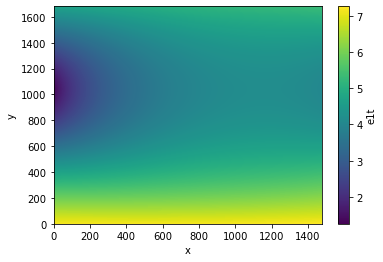

In [7]:
# output dir for plots
diro="/gpfswork/rech/cli/regi915/PLT/2024-07/904/"

# coordinate file
coords = xr.open_dataset("/gpfswork/rech/cli/rote001/NANUK12.L31/NANUK12.L31-I/coordinates_NANUK12.nc")
coords

# mesh mask file
mesh_mask = xr.open_dataset("/gpfswork/rech/cli/rote001/NANUK12.L31/NANUK12.L31-I/mesh_mask_NANUK12_L31_4.2.nc")
mesh_mask

# get resolution from e1t metric
res = coords['e1t']*1e-3
res.plot()

# ocean data file
oce = xr.open_dataset("/gpfswork/rech/cli/regi915/TMP/Xtract_NANUK12_ICE-BBM01_1h_20160101_20160131_grid_T.nc4")

# ice data file
ice = xr.open_dataset("/gpfswork/rech/cli/regi915/TMP/Xtract_NANUK12_ICE-BBM01_1h_20160101_20160131_icemod.nc4")

# Plot resolution and mesh map

[0]
[0, 2, 30]


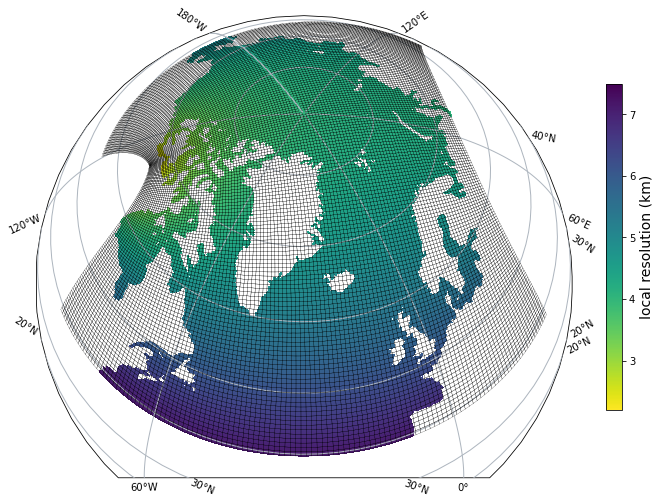

/gpfswork/rech/cli/regi915/PLT/2024-07/904/RES_grid1_12.png


In [37]:
namo='RES_grid1_12'
cmap, norm,cblev = Fsetcmapnorm('res',vmin=2.2,vmax=7.5)

lonf = coords['glamf'].data
latf = coords['gphif'].data
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([12,12]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use georgaphic projection 
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=-30, central_latitude=65.0,satellite_height=8000000)) 

# plot field (here it's grid resolution in km)
cs  = plt.pcolormesh(lonf, latf, res[1:, 1:].where(mesh_mask['tmaskutil'][0,1:,1:]>0),shading='flat',cmap=cmap,norm=norm,transform=trdata)

# plot continents
land = cfeature.GSHHSFeature(scale='low',
                                     levels=[1],
                                     facecolor='#727171',zorder=5)
#ax.add_feature(land,zorder=5)

# add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='-', linewidth=1, color='#aeb6bf',
                          alpha=1,zorder=500)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
#ax.set_extent([-360, 360, 0, 90], trdata)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')

 # add colorbar
cb = fig3.colorbar(cs, extend='neither', aspect=20, shrink=0.5, label='local resolution (km)')
cb.ax.set_ylabel('local resolution (km)', fontsize=14)  # Adjust fontsize as needed

#cb2 = fig3.colorbar(cs2, extend='neither', aspect=20, shrink=0.5, label='Sea Ice Concentration')
#cb2.ax.set_ylabel('Sea Ice Concentration', fontsize=14)  # Adjust fontsize as needed



# Add grid cell edges (plotting 1 out of every 12 cells)
# plot every 12 grid cells (i.e. at 1/12° res, a cell will be plotted for 1°)
step = 12
max_i = lonf.shape[0] - 1
max_j = lonf.shape[1] -1

# Fixed threshold for grid cell size to avoid spurious lines around longitude 180°
threshold_lon = 170.0
threshold_lat = 2.0

# Plot grid cell edges manually with size condition
for i in range(0, lonf.shape[0] - step, step):
    for j in range(0, lonf.shape[1] - step, step):
        # Calculate the differences in longitude and latitude
        lon_diff = np.abs(lonf[i + step, j + step] - lonf[i, j])
        lat_diff = np.abs(latf[i + step, j + step] - latf[i, j])

        lw=0.2
        al=1
        col='k' #'#696869'
        # Compare with the threshold
        if lon_diff <= threshold_lon :
            ax.plot([lonf[i, j], lonf[i + step, j]], [latf[i, j], latf[i + step, j]], color=col, transform=trdata, linewidth=lw,alpha=al,zorder=1000)
            ax.plot([lonf[i + step, j], lonf[i + step, j + step]], [latf[i + step, j], latf[i + step, j + step]], color=col, transform=trdata, linewidth=lw,alpha=al,zorder=1000)
            ax.plot([lonf[i + step, j + step], lonf[i, j + step]], [latf[i + step, j + step], latf[i, j + step]], color=col, transform=trdata, linewidth=lw,alpha=al,zorder=1000)
            ax.plot([lonf[i, j + step], lonf[i, j]], [latf[i, j + step], latf[i, j]], color=col, transform=trdata, linewidth=lw,alpha=al,zorder=1000)

plt.show()

# save plot
li.Fsaveplt(fig3,diro,namo,dpifig=600)



# plot SST and ice concentration map

[0]
[0, 2, 30]


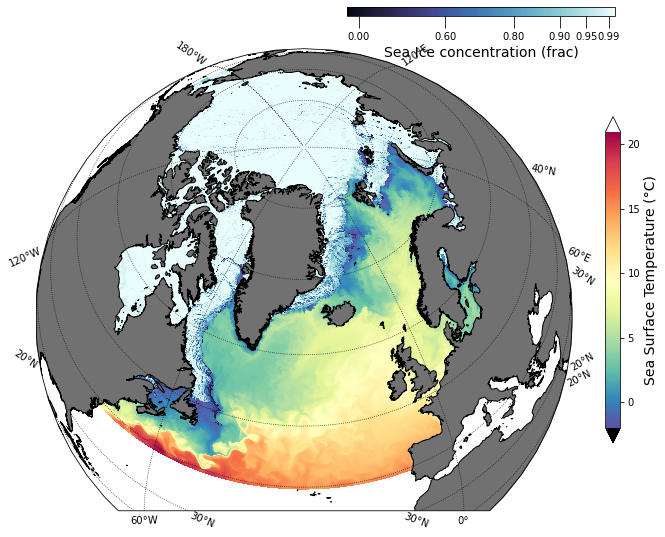

/gpfswork/rech/cli/regi915/PLT/2024-07/904/SST_SIC_12.png


In [20]:
namo='SST_SIC_12'
cmap, norm,cblev = Fsetcmapnorm('tos',vmin=-2,vmax=21)
cmap2, norm2,cblev2 = Fsetcmapnorm('siconc')

data2plot2 = ice['siconc'][0,1:, 1:].where(mesh_mask['tmaskutil'][0,1:,1:]>0)
data2plot2 = data2plot2.where(data2plot2>0.15)
# Create masked array for data2plot2 to handle NaNs
masked_data2plot2 = ma.masked_where(np.isnan(data2plot2), data2plot2)

data2plot = oce['tos'][0,1:, 1:].where(mesh_mask['tmaskutil'][0,1:,1:]>0)
data2plot = data2plot.where(np.isnan(data2plot2))

lonf = coords['glamf'].data
latf = coords['gphif'].data
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([12,12]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use georgaphic projection 
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=-30, central_latitude=65.0,satellite_height=8000000)) 

# plot field (here it's grid resolution in km)

cs2  = plt.pcolormesh(lonf, latf, masked_data2plot2,shading='flat',cmap=cmap2,norm=norm2,transform=trdata,alpha=1.0, edgecolors='face')
cs  = plt.pcolormesh(lonf, latf, data2plot,shading='flat',cmap=cmap,norm=norm,transform=trdata)



# plot continents
land = cfeature.GSHHSFeature(scale='low',
                                     levels=[1],
                                     facecolor='#727171')
ax.add_feature(land)

# add gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.8)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
#ax.set_extent([-360, 360, 0, 90], trdata)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')

 # add colorbars
#cb2 = fig3.colorbar(cs2, extend='max', aspect=20, shrink=0.5, label='Sea Ice Concentration')
#cb2.ax.set_ylabel('Sea Ice Concentration', fontsize=14)  # Adjust fontsize as needed

cb = fig3.colorbar(cs,extend='both',aspect=20,shrink=0.5,label='Sea Surface Temperature (°C)')
cb.ax.set_ylabel('Sea Surface Temperature (°C)', fontsize=14)  # Adjust fontsize as needed

cb2 = Fpltcolorbar(fig3,ax,'siconc',norm2,cmap2,cblev2,'Sea Ice concentration (frac)',textco='k')   


plt.show()

# save plot
li.Fsaveplt(fig3,diro,namo,dpifig=600)

